In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv('statsandsal.csv')

In [7]:
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Team,Salary
0,1,Jeff Adrien,PF,25,HOU,8,0,7.9,0.9,2.0,...,0.1,0.1,0.106,-4.0,-0.2,-4.3,0.0,513,Houston Rockets,"$762,195"
1,2,Arron Afflalo,SG,26,DEN,62,62,33.6,5.3,11.3,...,0.6,5.3,0.121,1.4,-1.2,0.1,1.1,79,Denver Nuggets,"$7,750,000"
2,3,Blake Ahearn,PG,27,UTA,4,0,7.5,1.0,3.5,...,0.0,-0.2,-0.315,-12.7,-6.8,-19.5,-0.1,601,Utah Jazz,"$117,134"
3,4,Solomon Alabi,C,23,TOR,14,0,8.7,0.9,2.6,...,0.2,0.2,0.083,-2.9,0.7,-2.2,0.0,462,Toronto Raptors,"$830,000"
4,5,Cole Aldrich,C,23,OKC,26,0,6.7,0.8,1.6,...,0.4,0.6,0.176,-1.3,2.2,1.0,0.1,259,Oklahoma City Thunder,"$2,286,000"


In [8]:
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,RK
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3985.000000,3990.000000,3990.000000,...,3989.000000,3990.000000,3990.000000,3990.000000,3989.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,249.476190,26.376441,52.921303,25.548371,20.675414,3.234987,7.182531,0.443645,0.750376,2.140125,...,18.800552,1.358647,1.248872,2.607945,0.080998,-1.103985,-0.107769,-1.212130,0.635940,256.091479
std,144.030772,4.290486,23.274611,28.120172,9.041004,2.122870,4.481663,0.088854,0.754054,1.970726,...,5.330403,1.962194,1.102831,2.794207,0.092737,4.515085,1.694656,5.507953,1.288325,161.383230
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.300000,-0.500000,-2.100000,-1.065000,-33.000000,-22.100000,-54.700000,-1.800000,1.000000
25%,125.000000,23.000000,36.000000,1.000000,13.600000,1.600000,3.700000,0.402000,0.100000,0.300000,...,15.000000,0.000000,0.400000,0.400000,0.043000,-2.800000,-0.900000,-3.000000,-0.100000,120.000000
50%,249.000000,26.000000,59.000000,12.000000,20.400000,2.800000,6.200000,0.439000,0.600000,1.800000,...,18.100000,0.800000,1.000000,1.800000,0.085000,-1.000000,-0.100000,-1.200000,0.200000,244.000000
75%,373.750000,29.000000,73.000000,51.000000,28.200000,4.500000,9.900000,0.485000,1.200000,3.400000,...,22.100000,2.100000,1.800000,3.900000,0.123000,0.500000,0.700000,0.700000,1.000000,375.000000
max,540.000000,43.000000,83.000000,82.000000,39.400000,10.900000,24.500000,1.000000,5.100000,13.200000,...,45.000000,14.800000,6.600000,19.300000,2.712000,199.400000,42.700000,242.200000,9.900000,697.000000


### Missing Values

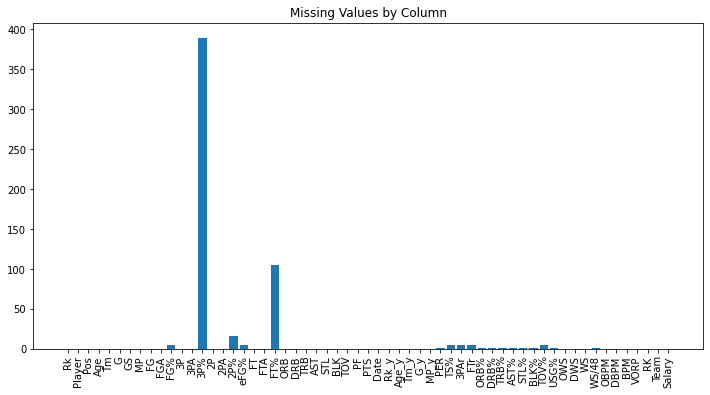

In [9]:
plt.figure(figsize=(12,6))
plt.bar(data.columns,data.isna().sum().values)
plt.xticks(rotation=90)
plt.title("Missing Values by Column")
plt.show()

The missing values occur when a player hasn't recorded any instance of that stat (i.e they never shot a 3 pointer or took a free throw). We will replace them with '0'.

In [10]:
data.fillna(0, inplace=True)

Drop columns that were duplicated from merging the two stat tables

In [11]:
all_cols = list(data.columns.values)
repeated = [x for x in all_cols if x[-2:]=='_y']
data.drop(columns=repeated, inplace=True)

Drop uninformative columns

In [12]:
dropped = ['Team','RK','Rk','Tm','Player']
data.drop(columns=dropped, inplace=True)
data.columns.values

array(['Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Date',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Salary'], dtype=object)

Some player have multiple positions separated by a hyphen, so we will only keep the first value

In [13]:
data.Pos.value_counts()

SG       846
PF       821
C        804
PG       758
SF       706
PF-C       9
SG-PG      9
PG-SG      7
SG-SF      7
PF-SF      7
SF-PF      6
SF-SG      5
C-PF       3
SF-C       1
SG-PF      1
Name: Pos, dtype: int64

In [14]:
data['Pos'] = data['Pos'].apply(lambda x: x.split('-')[0])
data['Pos'].value_counts()

SG    863
PF    837
C     807
PG    765
SF    718
Name: Pos, dtype: int64

Create a column for total minutes played over the entire season, since this may be more informative than just minutes per game

In [15]:
data = data.astype({'G': 'float','MP':'float'})
data['Tot_Mins'] = data['G']*data['MP']

We now need to standardize salaries into the same reference frame. In the NBA, there is a "soft" salary cap which dictates the maximum cumulative salary a team can spend on its players, with some exceptions. This number has increased significantly over the last decade as the league has increased revenue, as seen below:

![Salary Cap by Year](SalCap.jpg)

As a result, the average salary by year will be very different. We will first format the salary as float and then divide by 1,000,000 to make the values easier to interpret.

In [16]:
data['Salary'] = data['Salary'].apply(lambda x:x.replace(',','').split('$')[1]) 
data = data.astype({'Salary': 'float'})
data['Salary'] = data['Salary']/1000000
print(pd.pivot_table(data, index='Date', values='Salary'))

        Salary
Date          
2012  4.035777
2013  4.148389
2014  4.310006
2015  4.080973
2016  4.690396
2017  5.767772
2018  7.325365
2019  7.030826
2020  7.711300


The average salary clearly increases year-by-year. To account for this, I will standardize year-by-year salaries so they are all using a salary cap = $100,000,000 (or 100 in our version), only for the training data.

In [17]:
data_copy = data
caps = {
2012: 100/58.044000,	
2013: 100/58.044000,	
2014: 100/58.679000,	
2015: 100/63.065000,	
2016: 100/70.000000,	
2017: 100/94.143000,	
2018: 100/99.093000,	
2019: 100/101.869000,	
2020: 100/109.140000	
        }
data_copy['Factor'] = data_copy['Date'].map(caps)
data_copy['Salary'] = data_copy['Salary'] * data_copy['Factor']
data_copy.drop(columns='Factor',index=1,inplace=True)
print(pd.pivot_table(data_copy, index='Date', values='Salary'))

        Salary
Date          
2012  6.938991
2013  7.146973
2014  7.345056
2015  6.471058
2016  6.700566
2017  6.126607
2018  7.392414
2019  6.901830
2020  7.065513


Salary is much more similar year-by-year now

In [18]:
data.columns

Index(['Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Date', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Salary',
       'Tot_Mins'],
      dtype='object')

In [19]:
data.dtypes

Pos          object
Age           int64
G           float64
GS            int64
MP          float64
FG          float64
FGA         float64
FG%         float64
3P          float64
3PA         float64
3P%         float64
2P          float64
2PA         float64
2P%         float64
eFG%        float64
FT          float64
FTA         float64
FT%         float64
ORB         float64
DRB         float64
TRB         float64
AST         float64
STL         float64
BLK         float64
TOV         float64
PF          float64
PTS         float64
Date          int64
PER         float64
TS%         float64
3PAr        float64
FTr         float64
ORB%        float64
DRB%        float64
TRB%        float64
AST%        float64
STL%        float64
BLK%        float64
TOV%        float64
USG%        float64
OWS         float64
DWS         float64
WS          float64
WS/48       float64
OBPM        float64
DBPM        float64
BPM         float64
VORP        float64
Salary      float64
Tot_Mins    float64


# EDA

### Evaluate our target variable, Salary:

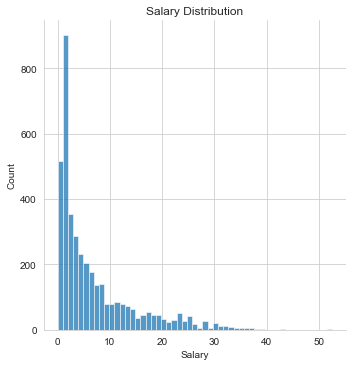

In [20]:
sns.set_style("whitegrid")
sns.displot(data,x='Salary')
plt.title('Salary Distribution')
plt.show()

This is not a normally distributed outcome variable, but since our objective is prediction and we will be using some non-parametric models, this should not be an issue

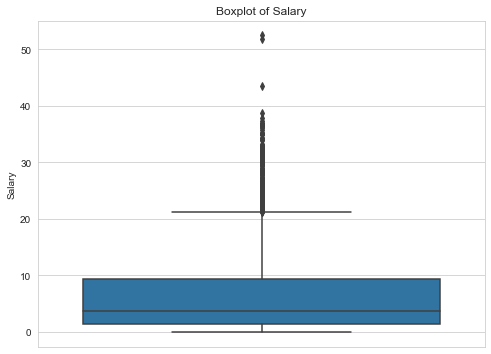

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Salary'])
plt.title('Boxplot of Salary')
plt.show()

There are many contracts for elite players which will take up >20% of a team's salary cap, appearing as outliers. However, we should not remove them since they are still key pieces of information for the model.

In [22]:
data['Salary'].describe()

count    3989.000000
mean        6.883464
std         7.718640
min         0.004650
25%         1.471968
50%         3.685167
75%         9.400197
max        52.466758
Name: Salary, dtype: float64

### Evaluate numerical columns

In [23]:
data_num = data.drop(columns=['Pos','Salary'])

In [24]:
data_num.shape

(3989, 48)

In [ ]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

- Many of the variables appear to be normally distributed with skews
- Lots of 0s for specialist stats such as 3 point shooting and Blocks

### Evaluate the one categorical variable: Position

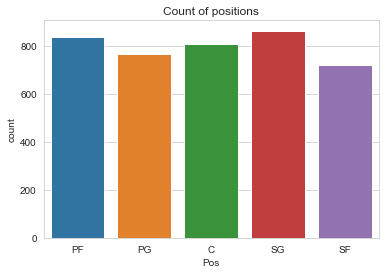

In [61]:
sns.countplot(data=data,x='Pos')
plt.title('Count of positions')
plt.show()

Positions are mostly evenly spread, with small forward being the lost common

## Correlations:

Choosing some factors I would expect to be important:

In [62]:
corr = data[['VORP','BPM','WS','Tot_Mins','USG%','PER','Age','FG','TS%','GS','Salary']].corr()
corr

,VORP,BPM,WS,Tot_Mins,USG%,PER,Age,FG,TS%,GS,Salary
VORP,1.000000,0.466505,0.914173,0.621232,0.453516,0.614673,0.084285,0.719201,0.336825,0.605460,0.574062
BPM,0.466505,1.000000,0.457167,0.347927,0.243412,0.820115,0.057437,0.402663,0.587620,0.301417,0.284365
WS,0.914173,0.457167,1.000000,0.787049,0.355184,0.631724,0.075114,0.750098,0.431472,0.717762,0.574918
Tot_Mins,0.621232,0.347927,0.787049,1.000000,0.327865,0.451711,0.037582,0.786079,0.331183,0.834700,0.516933
USG%,0.453516,0.243412,0.355184,0.327865,1.000000,0.499589,-0.090551,0.681537,0.115591,0.306558,0.401660
PER,0.614673,0.820115,0.631724,0.451711,0.499589,1.000000,0.002769,0.635062,0.697666,0.413860,0.415595
Age,0.084285,0.057437,0.075114,0.037582,-0.090551,0.002769,1.000000,0.006646,0.055152,0.020951,0.277529
FG,0.719201,0.402663,0.750098,0.786079,0.681537,0.635062,0.006646,1.000000,0.351931,0.735578,0.643698
TS%,0.336825,0.587620,0.431472,0.331183,0.115591,0.697666,0.055152,0.351931,1.000000,0.255115,0.191711
GS,0.605460,0.301417,0.717762,0.834700,0.306558,0.413860,0.020951,0.735578,0.255115,1.000000,0.548721


<AxesSubplot:>

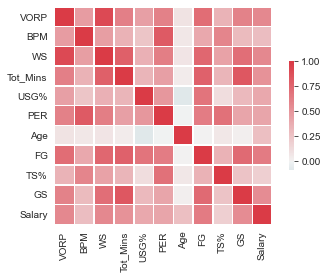

In [63]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Win shares, VORP, FG, and GS are the variables most correlated with Salary
    - Win shares are a cumulative stat (the more you play over a season, the higher the stat gets) so this rewards high-minute players 
    - GS (Games Started) follows the same logic, as players who are skilled enough to start for a team are subsequently well paid
    - Win shares and VORP have very high correlation (0.914) because they are built with similar methodology
- Age has a mild positive correlation as older players qualify for more expensive contracts under the Collective Bargaining Agreement

Looking at just defensive correlations:

In [64]:
defense = data[['DRB','DRB%','STL','STL%','BLK','BLK%','DBPM','DWS','Salary',]].corr()

In [65]:
defense

,DRB,DRB%,STL,STL%,BLK,BLK%,DBPM,DWS,Salary
DRB,1.000000,0.640842,0.463482,-0.017165,0.654143,0.289670,0.219031,0.748767,0.560227
DRB%,0.640842,1.000000,-0.058494,-0.109027,0.507205,0.514063,0.216011,0.315526,0.170645
STL,0.463482,-0.058494,1.000000,0.583090,0.188408,-0.112973,0.294050,0.608950,0.429198
STL%,-0.017165,-0.109027,0.583090,1.000000,-0.056533,-0.086716,0.416978,0.150184,0.021480
BLK,0.654143,0.507205,0.188408,-0.056533,1.000000,0.770473,0.314539,0.556529,0.307872
BLK%,0.289670,0.514063,-0.112973,-0.086716,0.770473,1.000000,0.346163,0.207524,0.032973
DBPM,0.219031,0.216011,0.294050,0.416978,0.314539,0.346163,1.000000,0.364104,0.087871
DWS,0.748767,0.315526,0.608950,0.150184,0.556529,0.207524,0.364104,1.000000,0.511314
Salary,0.560227,0.170645,0.429198,0.021480,0.307872,0.032973,0.087871,0.511314,1.000000


<AxesSubplot:>

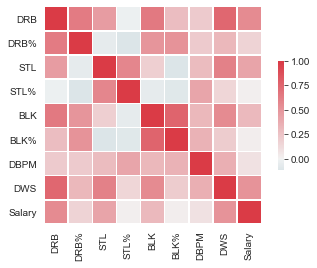

In [66]:
sns.heatmap(defense, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- The raw counting stats (DRB, STL, BLK) are much more correlated than their associated rates (DRB%, STL%, BLK%), again because players who play more are rewarded

Looking at offensive statistics:

In [67]:
offense = data[['3P','3P%','3PA','2P','2PA','2P%','OBPM','OWS','TOV%','USG%','FTr','ORB%','Salary']].corr()

In [68]:
offense

,3P,3P%,3PA,2P,2PA,2P%,OBPM,OWS,TOV%,USG%,FTr,ORB%,Salary
3P,1.000000,0.582086,0.983281,0.205631,0.240480,-0.030498,0.336045,0.383961,-0.232308,0.360208,-0.237910,-0.493753,0.297830
3P%,0.582086,1.000000,0.557037,0.050374,0.080480,-0.085068,0.279667,0.145574,-0.186756,0.175660,-0.288243,-0.495055,0.095629
3PA,0.983281,0.557037,1.000000,0.214774,0.253699,-0.036385,0.301212,0.344567,-0.231197,0.385388,-0.242859,-0.515489,0.305277
2P,0.205631,0.050374,0.214774,1.000000,0.982391,0.287724,0.418423,0.660821,-0.135175,0.640750,0.162703,0.123578,0.621761
2PA,0.240480,0.080480,0.253699,0.982391,1.000000,0.169279,0.389741,0.601268,-0.135776,0.679605,0.129260,0.062955,0.621313
2P%,-0.030498,-0.085068,-0.036385,0.287724,0.169279,1.000000,0.261784,0.305668,-0.035222,0.010554,0.216285,0.270675,0.126495
OBPM,0.336045,0.279667,0.301212,0.418423,0.389741,0.261784,1.000000,0.477037,-0.253617,0.367241,0.075781,-0.002948,0.314001
OWS,0.383961,0.145574,0.344567,0.660821,0.601268,0.305668,0.477037,1.000000,-0.170119,0.361442,0.205201,0.075457,0.531813
TOV%,-0.232308,-0.186756,-0.231197,-0.135175,-0.135776,-0.035222,-0.253617,-0.170119,1.000000,-0.113204,0.165631,0.072226,-0.062578
USG%,0.360208,0.175660,0.385388,0.640750,0.679605,0.010554,0.367241,0.361442,-0.113204,1.000000,0.042538,-0.070175,0.401660


<AxesSubplot:>

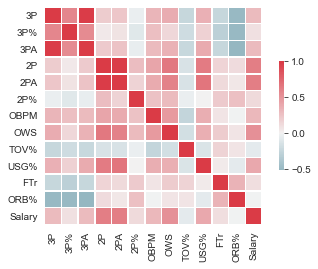

In [69]:
sns.heatmap(offense, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- 2P, 2PA, OWS, and USG% are most correlated with Salary
    - 2P and 2PA indicates that high scorers are rewarded and USG% (which represents how involved a player is on a team) indicates that players which are active on the court are rewarded

### Evaluating trends over time

The last three years have seen dramatic changes to the way the NBA is played, with a larger emphasis on 3-point shooting, shots close to the basket, and free throw shooting

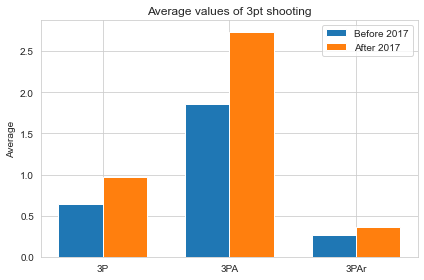

In [70]:
data_cop = data
Past_Values = [data_cop.loc[data['Date']<=2017,'3P'].mean(), data_cop.loc[data['Date']<=2017,'3PA'].mean(),data_cop.loc[data['Date']<=2017,'3PAr'].mean()]
Rec_Values = [data_cop.loc[data['Date']>2017,'3P'].mean(), data_cop.loc[data['Date']>2017,'3PA'].mean(),data_cop.loc[data['Date']>2017,'3PAr'].mean()]
labels = ['3P','3PA','3PAr']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Past_Values, width, label='Before 2017')
rects2 = ax.bar(x + width/2, Rec_Values, width, label='After 2017')

ax.set_ylabel('Average')
ax.set_title('Average values of 3pt shooting')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

Examine the variable correlations with salary which changed the most:

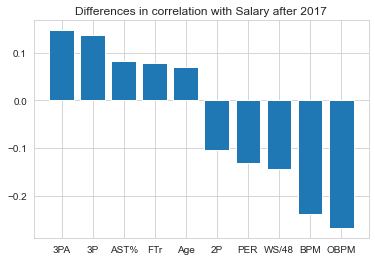

In [71]:
recent = data.loc[data['Date']>2017]
past = data.loc[data['Date']<=2017]
all_corr_past = past.corr()
all_corr_rec = recent.corr()
diff = all_corr_rec - all_corr_past
diff.sort_values(['Salary'], ascending=False,inplace=True)
s1 = diff['Salary'].head()
s2 = diff['Salary'].tail()
plt.bar(pd.concat([s1,s2]).index.values, pd.concat([s1,s2]).values)
plt.title('Differences in correlation with Salary after 2017')
plt.show()

- 3P and 3PA appear more correlated 
- BPM and OBPM appeared to be much less important, this may be reflective of a lower league-wide emphasis on traditional box-score statistics (which is what BPM uses for calculations), but it would require more analysis

## Stratifying by Position

We might expect that the variables most correlated with salary would not be the same for each position.

In [72]:
print(pd.pivot_table(data, index='Pos', values='Salary'))

,Salary
Pos,
C,7.742265
PF,7.065875
PG,6.751834
SF,6.723981
SG,6.151997


In [73]:
def stratify(pos):
    global data
    return data.loc[data['Pos']==pos]
pg = stratify('PG')
sg = stratify('SG')
sf = stratify('SF')
pf = stratify('PF')
c = stratify('C')

In [74]:
pg_vals = list(pg.corr().sort_values(['Salary'],ascending=False).iloc[1:6,-2].index.values)
sg_vals = list(sg.corr().sort_values(['Salary'],ascending=False).iloc[1:6,-2].index.values)
sf_vals = list(sf.corr().sort_values(['Salary'],ascending=False).iloc[1:6,-2].index.values)
pf_vals = list(pf.corr().sort_values(['Salary'],ascending=False).iloc[1:6,-2].index.values)
c_vals = list(c.corr().sort_values(['Salary'],ascending=False).iloc[1:6,-2].index.values)

pos_vars = pd.DataFrame({'Position':list(data.Pos.unique()),'Variables':[pf_vals,pg_vals,c_vals,sg_vals,sf_vals]})

In [75]:
pos_vars

,Position,Variables
0,PF,"[FGA, PTS, FG, FT, 2PA]"
1,PG,"[PTS, FG, FGA, AST, FT]"
2,C,"[MP, DRB, PTS, FG, FGA]"
3,SG,"[PTS, FG, FGA, TOV, 2P]"
4,SF,"[AST, PTS, TOV, FGA, FG]"


Many of the variables are shared across positions, such as scoring statistics like FG, FGA, PTS but Centers are the only positions which are rewarded for their rebounding.